# Complex Networks Metrics Applied to Barcelona Transportation

### Balthazar Paixão

December 2023


### Assignment

#### In this assignment you must install and get familiar with the NetworkX library for network analysis. You must choose at least one network available in The Colorado Index of Complex Networks (ICON) repository (https://icon.colorado.edu/#!/), and compare it with networks created by 3 network models: Random, WS and BA, using the following characteristics: degree distribuition, distance and clustering. Prepare a report and submit the report in this assignment.


### [Barcelona Transportation] (https://github.com/bstabler/TransportationNetworks/blob/master/Barcelona)

#### The chosen network is a directed network of the public transportation system of Barcelona, Spain. The network contains 1,1020 nodes and 2522 edges. The nodes represent the bus stops and the edges represent the bus lines. The network is directed because the bus lines have a direction of travel. The network is weighted because the edges have a weight that represents the time it takes to travel along the edge.

- Zones: 110
- Nodes: 1020
- Links: 2522
- Trips: 184679.561


In [1]:
# libs imports

from random import sample
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
filename = "../../../data/2023_3/Barcelona_flow.tntp"

In [3]:
# function to read the edges and vertex by: https://github.com/jvmaues


def load_graph(filename: str):
    edges = []
    volume = []
    cost = []
    with open(filename, "r") as f:
        f.readline()
        for line in f:
            e1, e2, e3, e4 = [x.strip() for x in line.split()]
            edges.append((e1, e2))
            volume.append(float(e3))
            cost.append(float(e4))
    return edges, volume, cost

In [4]:
edges, volume, cost = load_graph(filename)

# create the graph
G = nx.DiGraph()
G.add_edges_from(edges)
G.add_weighted_edges_from(
    [(edges[i][0], edges[i][1], volume[i]) for i in range(len(edges))]
)
# add cost
for i in range(len(edges)):
    G[edges[i][0]][edges[i][1]]["cost"] = cost[i]

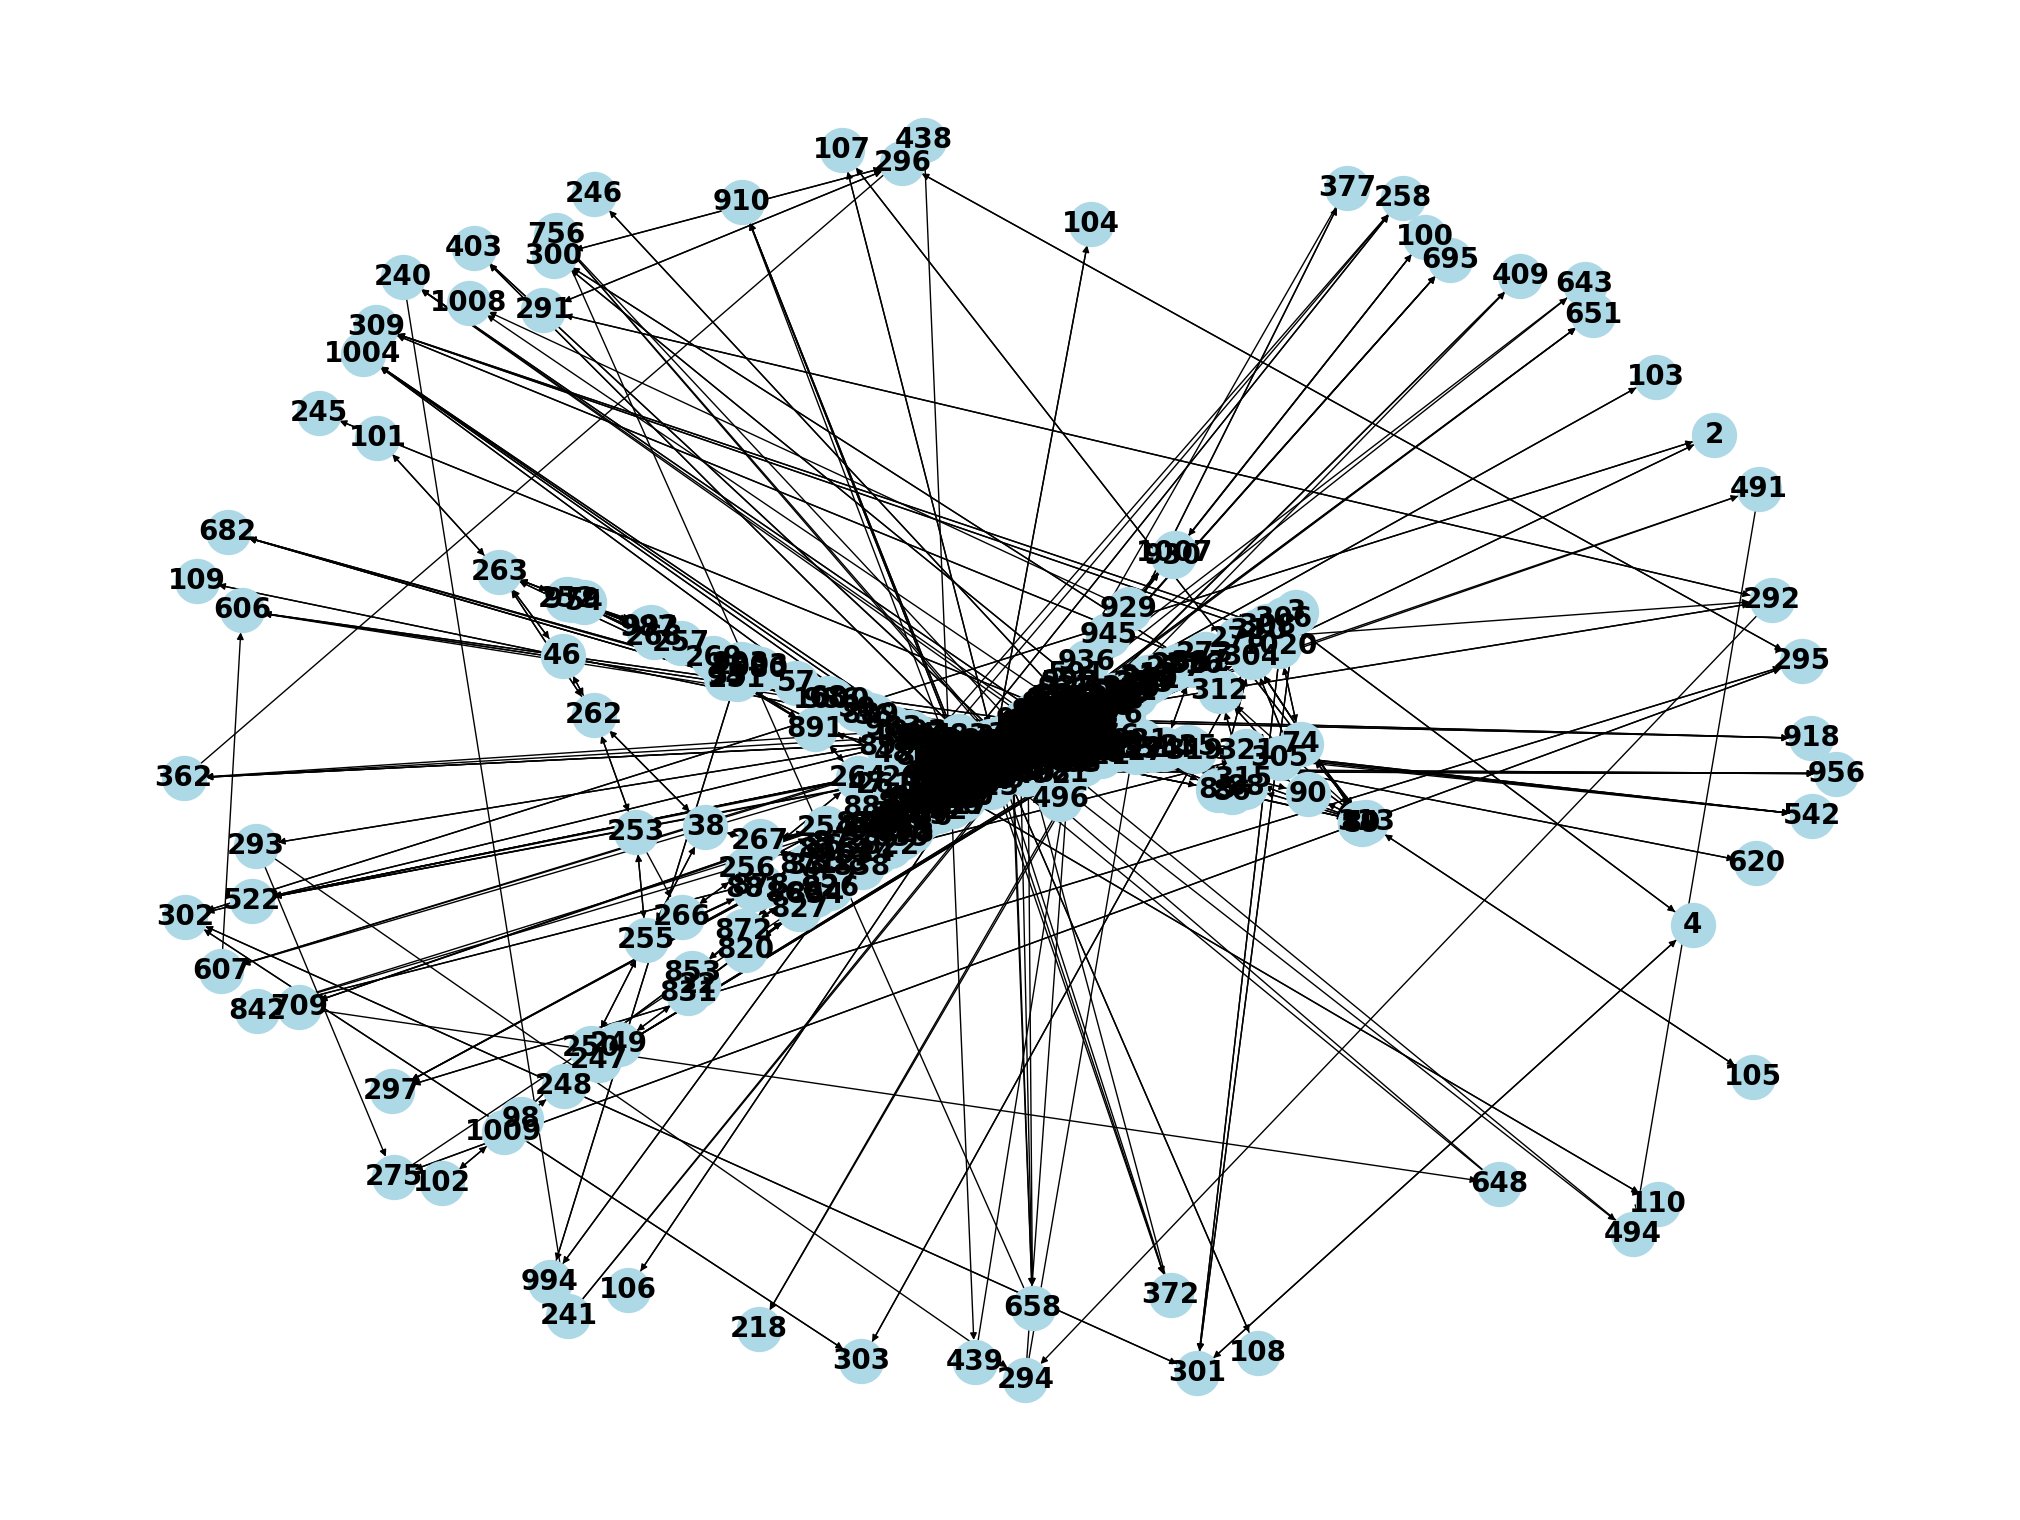

In [5]:
# Plotting the directed graph from the stations
plt.figure(figsize=(20, 15))

nx.draw(
    G,
    with_labels=True,
    font_weight="bold",
    node_size=1000,
    node_color="lightblue",
    font_size=20,
)
plt.draw()

We know that the probability of creating an edge between two nodes can be calculated as
`expected_edges = p * C(nodes, 2)`.

Since we know the number of edges in the real network, we can infer our probability of creating edges with `p = expected_edges / C(nodes, 2)`

In [6]:
n_nodes = len(G.nodes)
n_edges = len(G.edges)

p = n_edges / (n_nodes * (n_nodes - 1) / 2)

print("Number of nodes: ", n_nodes)
print("Number of edges: ", n_edges)

Number of nodes:  930
Number of edges:  2522


## Random

In [7]:
random_edges = []
for i in range(n_nodes):
    for j in range(i + 1, n_nodes):
        if np.random.random() < p:
            random_edges.append((i, j))

# create the graph
G_random = nx.Graph()
G_random.add_edges_from(random_edges)

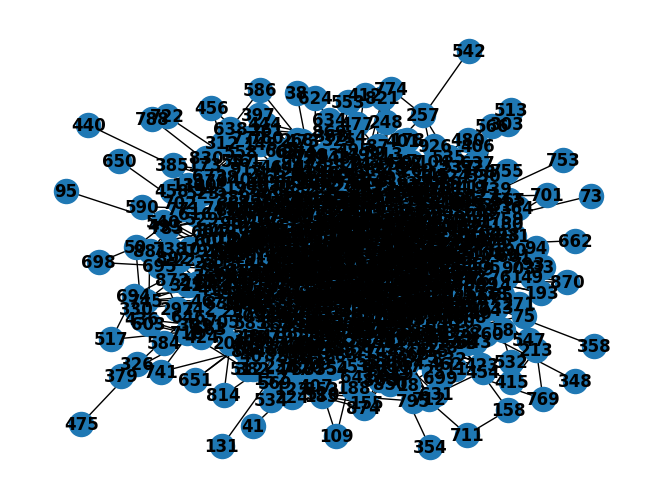

In [8]:
nx.draw(G_random, with_labels=True, font_weight="bold")

## Watts Strogatz

In [9]:
G_WS = nx.watts_strogatz_graph(n_nodes, k=4, p=p, seed=57)

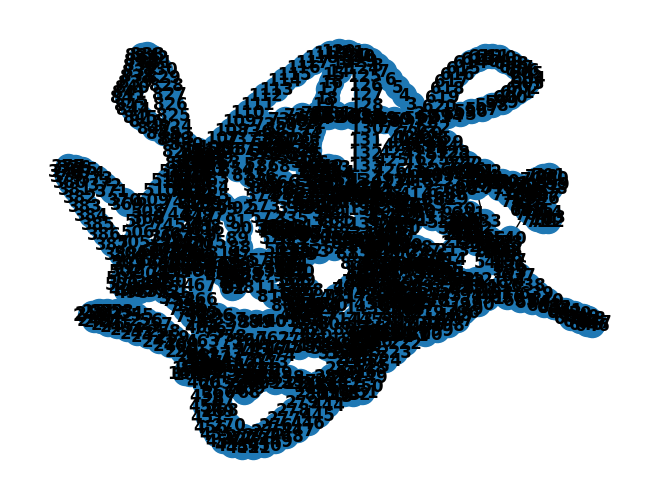

In [10]:
nx.draw(G_WS, with_labels=True, font_weight="bold")

## Barabasi Albert

In [11]:
G_BA = nx.barabasi_albert_graph(n_nodes, m=4, seed=57)

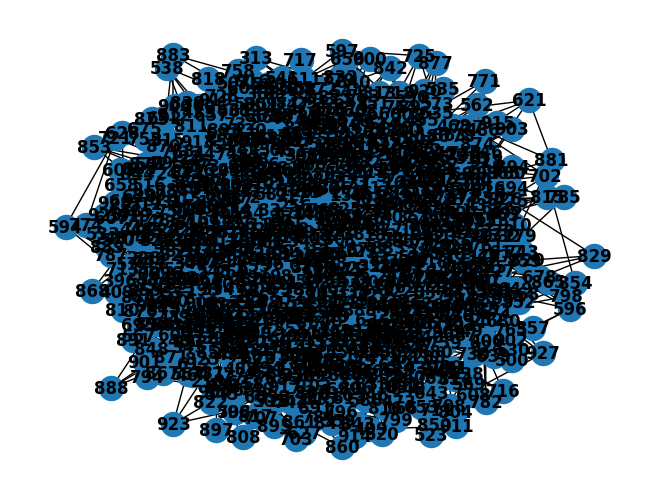

In [12]:
nx.draw(G_BA, with_labels=True, font_weight="bold")

# Analysis

utilizando as seguintes características: distribuição de grau, distância e clusterização.

## Degree distribution

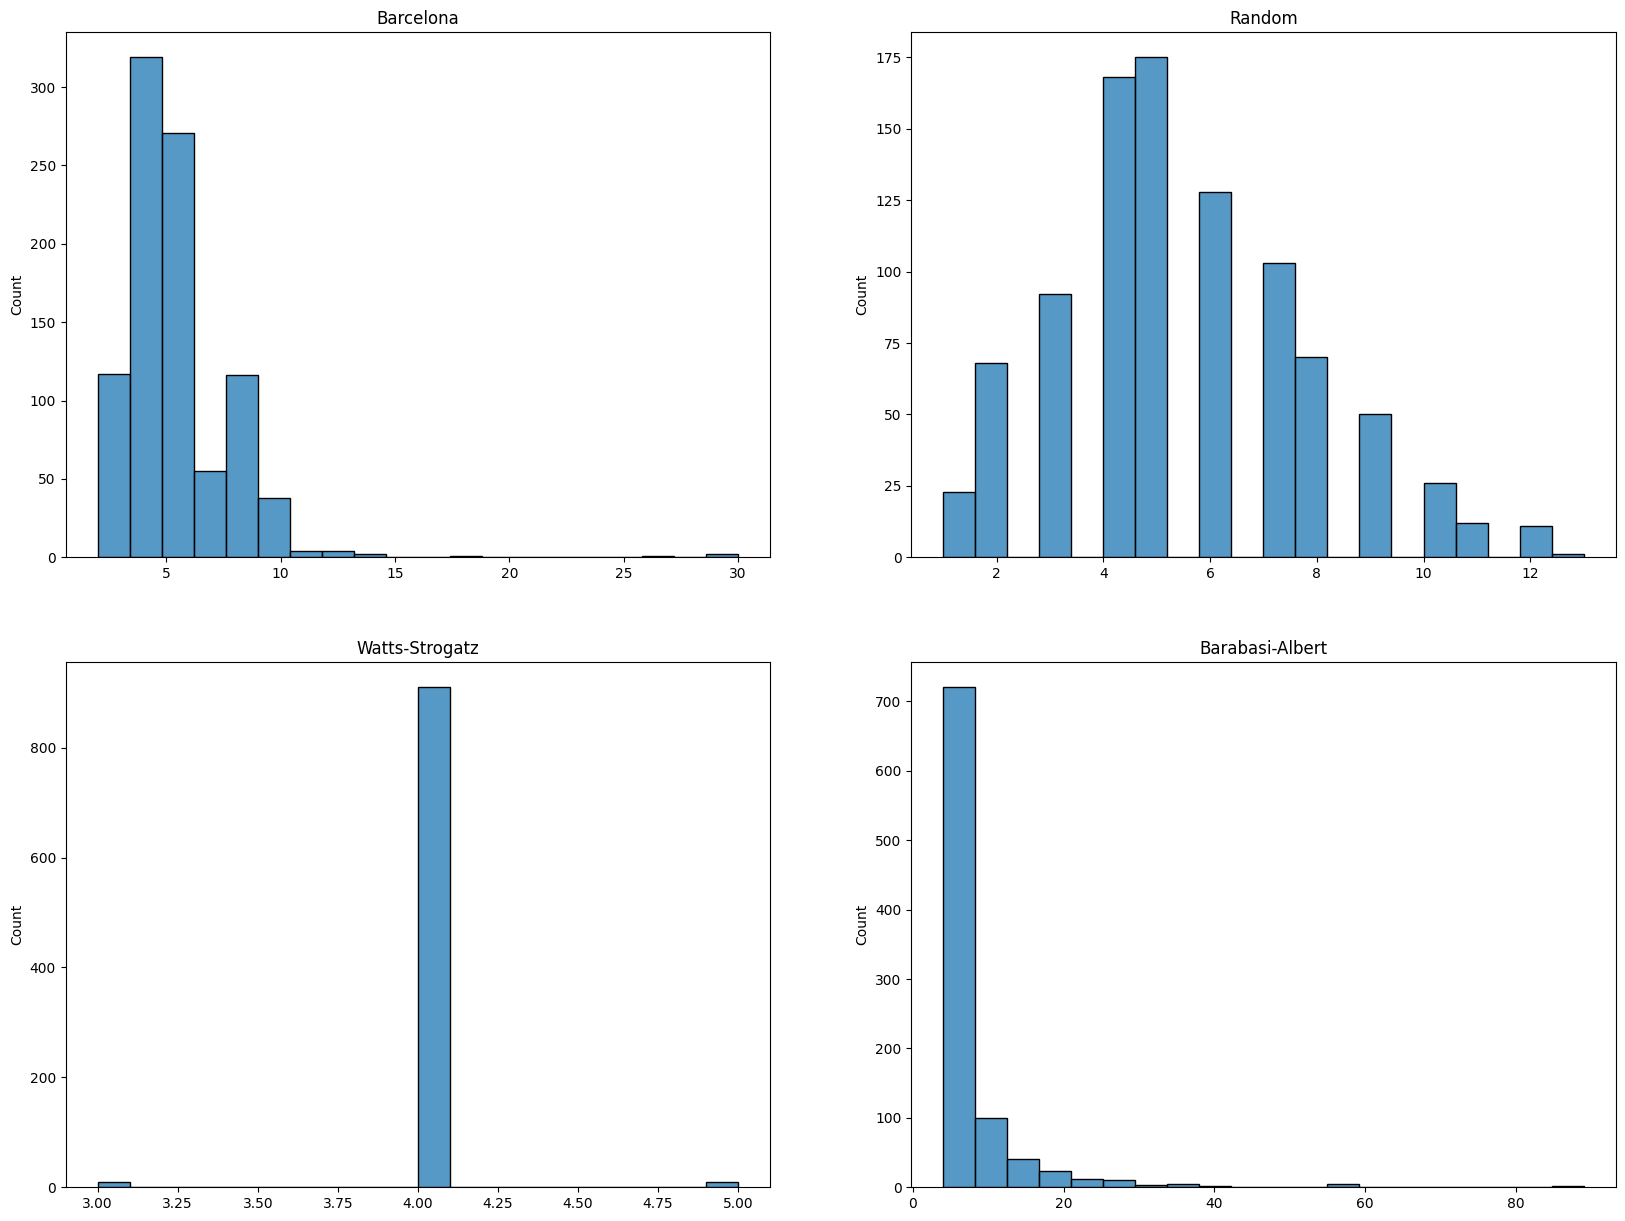

In [13]:
# Degree hist plot - 20 bins
degrees = [G.degree(n) for n in G.nodes()]
degrees_random = [G_random.degree(n) for n in G_random.nodes()]
degrees_WS = [G_WS.degree(n) for n in G_WS.nodes()]
degrees_BA = [G_BA.degree(n) for n in G_BA.nodes()]
# 4 axes
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(degrees, bins=20, ax=ax[0, 0])
ax[0, 0].set_title("Barcelona")
sns.histplot(degrees_random, bins=20, ax=ax[0, 1])
ax[0, 1].set_title("Random")
sns.histplot(degrees_WS, bins=20, ax=ax[1, 0])
ax[1, 0].set_title("Watts-Strogatz")
sns.histplot(degrees_BA, bins=20, ax=ax[1, 1])
ax[1, 1].set_title("Barabasi-Albert")
plt.show()


In [14]:
mean_degree = np.mean(degrees)
mean_degree_random = np.mean(degrees_random)
mean_degree_WS = np.mean(degrees_WS)
mean_degree_BA = np.mean(degrees_BA)

print(f"Mean degree: {mean_degree:.2f}")
print(f"Mean degree random: {mean_degree_random:.2f}")
print(f"Mean degree WS: {mean_degree_WS:.2f}")
print(f"Mean degree BA: {mean_degree_BA:.2f}")

Mean degree: 5.42
Mean degree random: 5.41
Mean degree WS: 4.00
Mean degree BA: 7.97


We can verify that the Barabasi-Albert network is the one that best fits the real network, since it has a power law distribution, which is the one that best fits the real network. 

The random network show a normal distribution, which is not the case of the Barcelona Transports network. 

The Watts-Strogatz network displays a distribution with a huge peak with 4 degrees, which is the number of neighbours that each node has in the network. 

In terms of mean degree, the random network is the one who has the mean degree closer to the real network, given the probability that we inferred.

## Distance

In [16]:
# average distance

distance = nx.shortest_path_length(G)
avg_distance = np.mean([length for node_lengths in distance for length in node_lengths[1].values()])

distance_random = nx.shortest_path_length(G_random)
avg_distance_random = np.mean([length for node_lengths in distance_random for length in node_lengths[1].values()])

distance_WS = nx.shortest_path_length(G_WS)
avg_distance_WS = np.mean([length for node_lengths in distance_WS for length in node_lengths[1].values()])

distance_BA = nx.shortest_path_length(G_BA)
avg_distance_BA = np.mean([length for node_lengths in distance_BA for length in node_lengths[1].values()])


print(f"Average distance: {avg_distance:.2f}")
print(f"Average distance random: {avg_distance_random:.2f}")
print(f"Average distance WS: {avg_distance_WS:.2f}")
print(f"Average distance BA: {avg_distance_BA:.2f}")

Average distance: 14.00
Average distance random: 4.25
Average distance WS: 38.44
Average distance BA: 3.17


Regarding the average distance, the Watts-Strogatz graph presents higher values than the others. 

The Barabasi-Albert graph presents the lowest values, very close to the random graph.

No generated graph presents a value close to the real graph.

In [17]:
## Clustering

clustering = nx.clustering(G)
avg_clustering = np.mean(list(clustering.values()))

clustering_random = nx.clustering(G_random)
avg_clustering_random = np.mean(list(clustering_random.values()))

clustering_WS = nx.clustering(G_WS)
avg_clustering_WS = np.mean(list(clustering_WS.values()))

clustering_BA = nx.clustering(G_BA)
avg_clustering_BA = np.mean(list(clustering_BA.values()))

print(f"Average clustering: {avg_clustering:.2f}")
print(f"Average clustering random: {avg_clustering_random:.2f}")
print(f"Average clustering WS: {avg_clustering_WS:.2f}")
print(f"Average clustering BA: {avg_clustering_BA:.2f}")

Average clustering: 0.06
Average clustering random: 0.01
Average clustering WS: 0.49
Average clustering BA: 0.04


Exploring Clustering information, we can say that the clustering coefficient is higher in the Watts-Strogatz graph, meaning that the nodes are more clustered in this graph. This is due to the fact that the Watts-Strogatz graph is a small-world graph, which means that the nodes are more clustered than in a random graph, but the average distance between nodes is still small.

The clustering in the random graph is the lowest, which is expected, since the graph is random, and the nodes are not clustered at all.

The Barcelona and Barabasi-Albert graphs presents similar clustering coefficients.